In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.max_columns", None)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [5]:
from elk.ensemble import EnsembleLC

c = EnsembleLC(output_path="../../output",
               identifier='NGC 330',
               location='14.031366421592, -72.463926813705',
               cluster_age=0,
               radius=.042,
               cutout_size=99,
               verbose=True)

In [8]:
c.lightcurves_summary_file()

NGC 330 has 3 observations
Starting Quality Tests for Observation: 0
  Failed General Quality Test 
Starting Quality Tests for Observation: 1
  Failed General Quality Test 
Starting Quality Tests for Observation: 2


100%|████████████████████████| 9801/9801 [1:03:07<00:00,  2.59it/s]


  Passed Quality Tests 


name,location,radius,log_age,has_data,n_obs,n_good_obs,which_sectors_good,n_failed_download,n_bad_quality,n_scatter_light,lc_lens
str7,str33,float64,int64,bool,int64,int64,int64[1],int64,int64,int64,int64[1]
NGC 330,"14.031366421592, -72.463926813705",0.042,0,True,3,1,28,0,2,0,3449


Notice how the the first 2 Sectors did not pass the quality tests, but the third one did!

In order to access this light curve, do:

In [13]:
lc = c.lcs[2]
lc

<TESSCutLightcurve: TESS Sector 28, 3449 timesteps>

The 2 represents the indice where the good observation is located. There will no return for ``c.lcs[0]``, and ``c.lcs[1]``. 

Observe the type of object returned: ``TESSCutLightcurve``

This type of object has access to all of the tpfs information for this sector. This includes the pixel flux map, which can be desplayed by:

<Axes: title={'center': 'Target ID: NGC 330, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

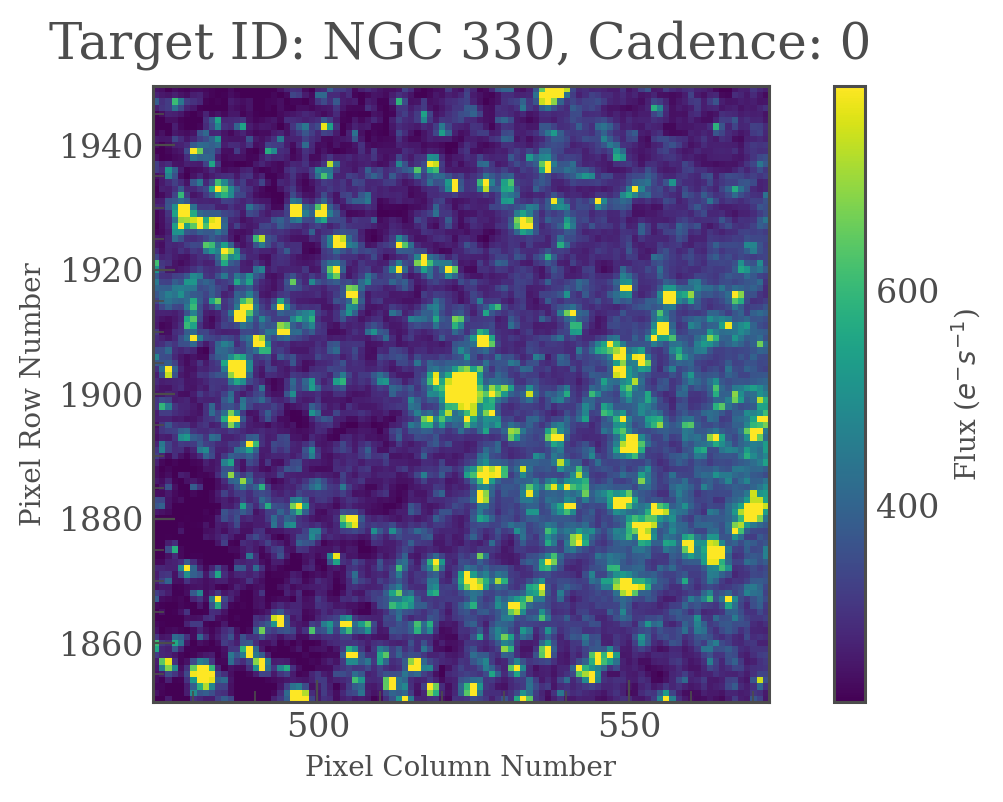

In [12]:
lc.tpfs.plot()

If you have previously downloaded and corrected the light curve for this sector, when you run the class again you will see: 


In [24]:
c = EnsembleLC(output_path="../../output",
               identifier='NGC 330',
               location='14.031366421592, -72.463926813705',
               cluster_age=0,
               radius=.042,
               cutout_size=99,
               verbose=True)


c.lightcurves_summary_file()

Found previously corrected data for this target, loading it! (Set `ignore_previous_downloads=True` to ignore data)
NGC 330 has 3 observations


name,location,radius,log_age,has_data,n_obs,n_good_obs,which_sectors_good,n_failed_download,n_bad_quality,n_scatter_light,lc_lens
str7,str33,float64,int64,bool,int64,int64,int64[1],int64,int64,int64,int64[1]
NGC 330,"14.031366421592, -72.463926813705",0.042,0,True,3,0,28,0,0,0,3449


And now the only returned lightcurve will be the one good sector observation, and the returned lightcurve will be 'BasicLightcurve' which does not have any saved tpfs information. 

In [26]:
c.lcs

[<BasicLightcurve: TESS Sector 28, 3449 timesteps>]

To plot the light curve you can simply: 

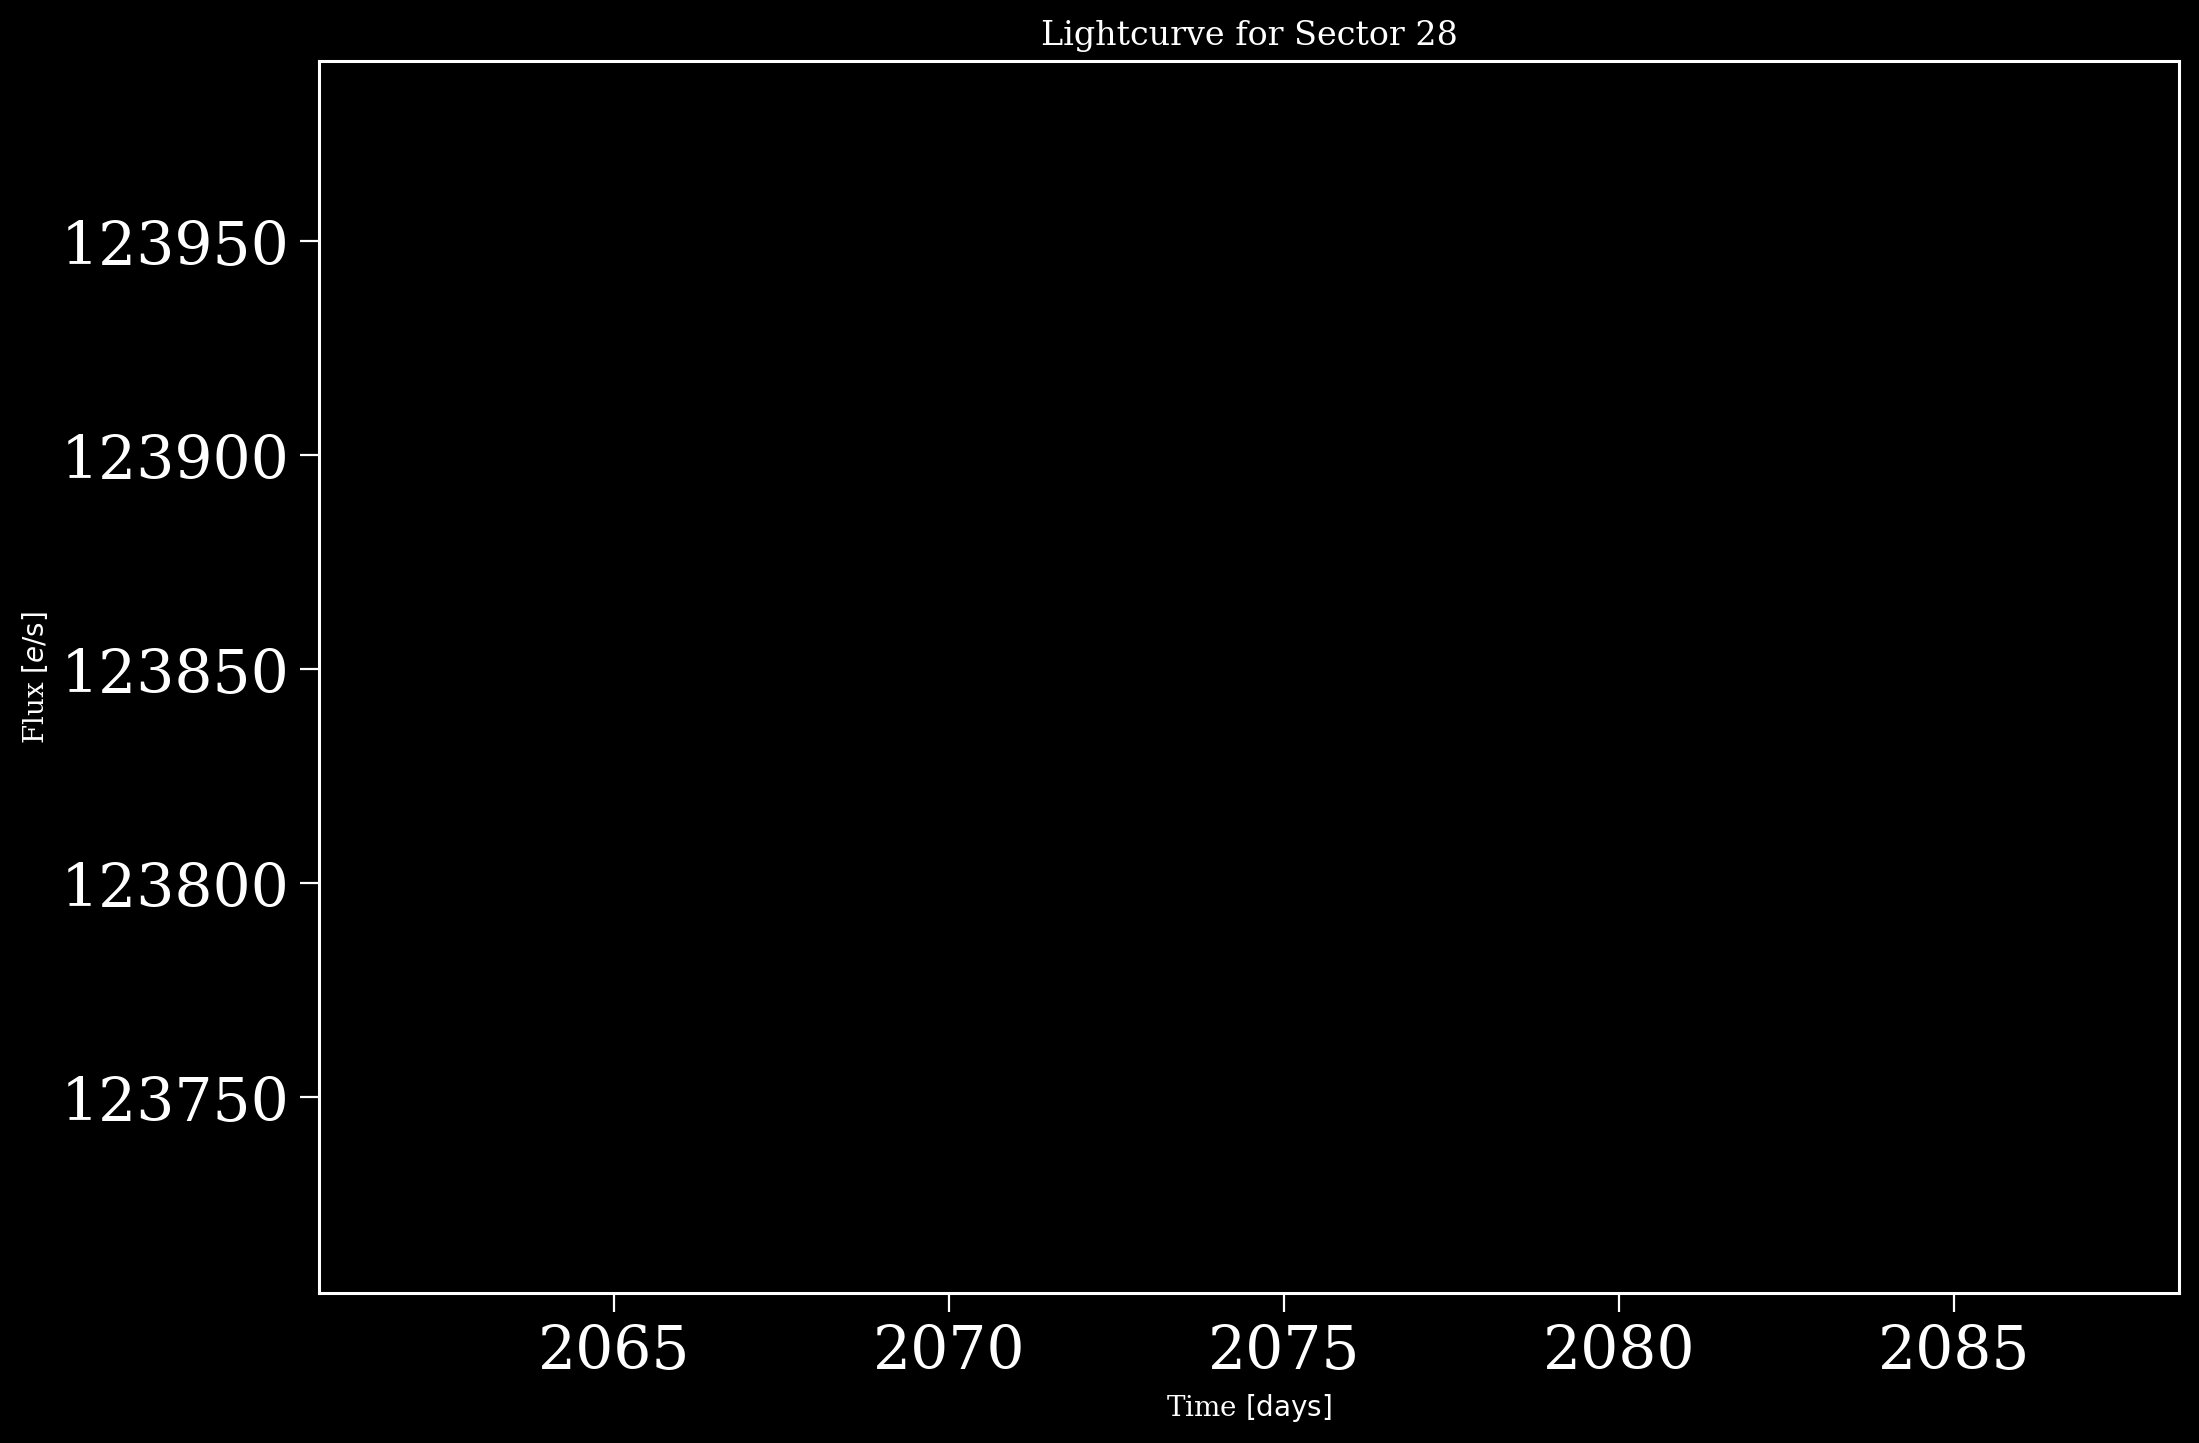

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Lightcurve for Sector 28'}, xlabel='Time $\\rm [days]$', ylabel='Flux $[e / {\\rm s}]$'>)

In [23]:
lc.plot()

For more investigation into your lightcurve, please visit: TODO put link to analysis 